In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
from IPython.display import display

# print(f"デフォルトのフォント: {plt.rcParams['font.sans-serif']}")
# for font in fontManager.ttflist:
#     if font.name.startswith('Noto'):
#         continue
#     print(font.name)
print(', '.join(sorted(list(set([font.name for font in fontManager.ttflist if not font.name.startswith('Noto')])))))

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 10  
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 14  
plt.rcParams['xtick.labelsize'] = 10  
plt.rcParams['ytick.labelsize'] = 10 

os.makedirs('out/figs', exist_ok=True)

Agency FB, Algerian, Arial, Arial Rounded MT Bold, BIZ UDGothic, BIZ UDMincho, Bahnschrift, Baskerville Old Face, Bauhaus 93, Bell MT, Berlin Sans FB, Berlin Sans FB Demi, Bernard MT Condensed, Blackadder ITC, Bodoni MT, Book Antiqua, Bookman Old Style, Bookshelf Symbol 7, Bradley Hand ITC, Britannic Bold, Broadway, Brush Script MT, Calibri, Californian FB, Calisto MT, Cambria, Candara, Castellar, Centaur, Century, Century Gothic, Century Schoolbook, Chiller, Colonna MT, Comic Sans MS, Consolas, Constantia, Cooper Black, Copperplate Gothic Bold, Copperplate Gothic Light, Corbel, Courier New, Curlz MT, DejaVu Math TeX Gyre, DejaVu Sans, DejaVu Sans Display, DejaVu Sans Mono, DejaVu Serif, DejaVu Serif Display, Dubai, Ebrima, Edwardian Script ITC, Elephant, Engravers MT, Eras Bold ITC, Eras Demi ITC, Eras Light ITC, Eras Medium ITC, Felix Titling, Footlight MT Light, Forte, Franklin Gothic Book, Franklin Gothic Demi, Franklin Gothic Demi Cond, Franklin Gothic Heavy, Franklin Gothic Mediu

## fig1
- Draw pie chart ing fig1

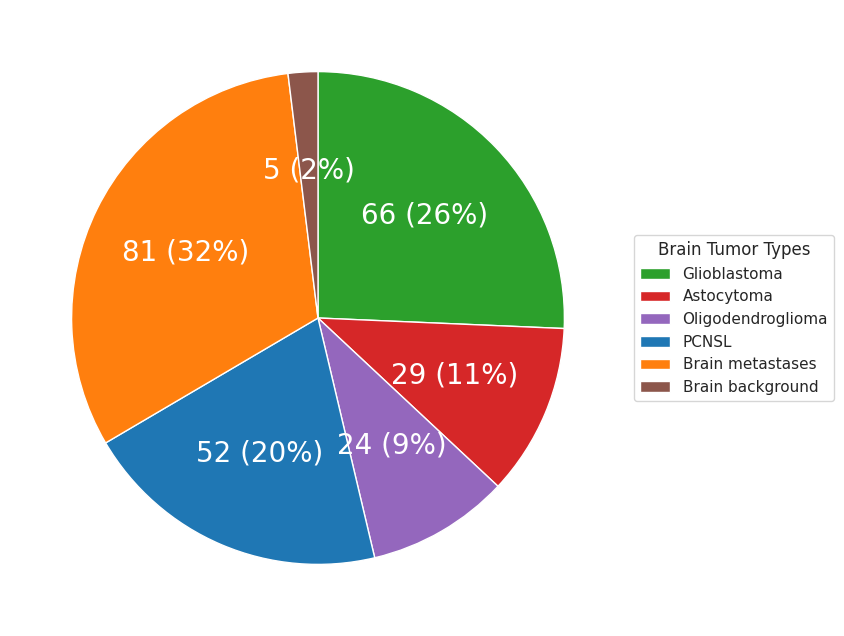

In [2]:
data = {
    'Glioblastoma': 66,
    'Astocytoma': 29,
    'Oligodendroglioma': 24,
    'PCNSL': 52,
    'Brain metastases': 81,
    'Brain background': 5,
}

colors = [
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:blue',
    'tab:orange',
    'tab:brown',
]

labels = list(data.keys())
counts = list(data.values())
total = sum(counts)

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=None,
    # labels=labels,
    autopct=lambda p: f'{round(p*total/100)} ({round(p)}%)',
    startangle=90, 
    counterclock=False, 
    colors=colors
)

for text in autotexts:
    text.set_fontsize(20)
    text.set_color('white')
plt.legend(wedges, labels, title="Brain Tumor Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("out/figs/fig1_pie.png", format="png", dpi=300)
plt.show()

## fig2

Shows counts per case based on Diagnosis.

In [3]:
from datasets import FoldDataset

ds = FoldDataset(
    source='enda4_512',
    fold=-1,
    total_fold=5,
    code='LMGAO_',
    limit=-1,
    upsample=False,
    target='all',
)
ds.df

Using cache files
loaded all for fold -1
Balance: cases
0 all:51 A:6 G:13 L:11 M:16 O:5
1 all:49 A:5 G:13 L:10 M:17 O:4
2 all:49 A:5 G:13 L:10 M:16 O:5
3 all:50 A:5 G:14 L:10 M:16 O:5
4 all:50 A:5 G:13 L:11 M:16 O:5
Balance: tiles
0 all:28630 A:2937 G:9142 L:4060 M:9375 O:3116
1 all:26404 A:2016 G:9627 L:2891 M:9711 O:2159
2 all:26055 A:2158 G:9942 L:3068 M:8412 O:2475
3 all:27244 A:2217 G:10332 L:3312 M:8806 O:2577
4 all:27053 A:2512 G:8900 L:3657 M:9066 O:2918


,name,diag,order,y,x,filename,original,width,height,area,count,fold,diag_org
0,18-0370,L,1,0,0,0000.jpg,18-0370_01.jpg,594,613,0.931928,75,1,L
1,18-0370,L,1,0,1,0001.jpg,18-0370_01.jpg,594,613,0.998371,75,1,L
2,18-0370,L,1,0,2,0002.jpg,18-0370_01.jpg,594,613,0.982631,75,1,L
3,18-0370,L,1,0,3,0003.jpg,18-0370_01.jpg,595,613,0.864837,75,1,L
4,18-0370,L,1,0,4,0004.jpg,18-0370_01.jpg,595,613,0.429498,75,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135381,N21-108,O,10,5,1,0463.jpg,N21-108_10.jpg,564,526,0.999778,468,4,O
135382,N21-108,O,10,5,2,0464.jpg,N21-108_10.jpg,564,526,0.999663,468,4,O
135383,N21-108,O,10,5,3,0465.jpg,N21-108_10.jpg,564,526,0.999537,468,4,O
135384,N21-108,O,10,5,4,0466.jpg,N21-108_10.jpg,564,526,0.999756,468,4,O


In [4]:
import seaborn as sns

fig = plt.figure(figsize=(14, 6))
ax = sns.countplot(
    ds.df,
    x='name',
    hue='diag',
    order=ds.df['name'].value_counts().index,
    # hue_order=['G', 'A', 'O', 'L', 'M'],
)
plt.xticks([])
plt.xlabel('Cases')
plt.ylabel('Patch count per case')  # y軸ラベルを変更

legend_full_names = {
    'G': 'Glioblastoma',
    'A': 'Astrocytoma,',
    'O': 'Oligodendroglioma',
    'L': 'PCNSL',
    'M': 'Brain Metastases',
}

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    [by_label[l] for l in legend_full_names],
    list(legend_full_names.values()),
    title='Diagnosis',
    loc='upper right'
)

for y in [500, 100, 50, 25, 10]:
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.5, linewidth=0.7)
plt.close()

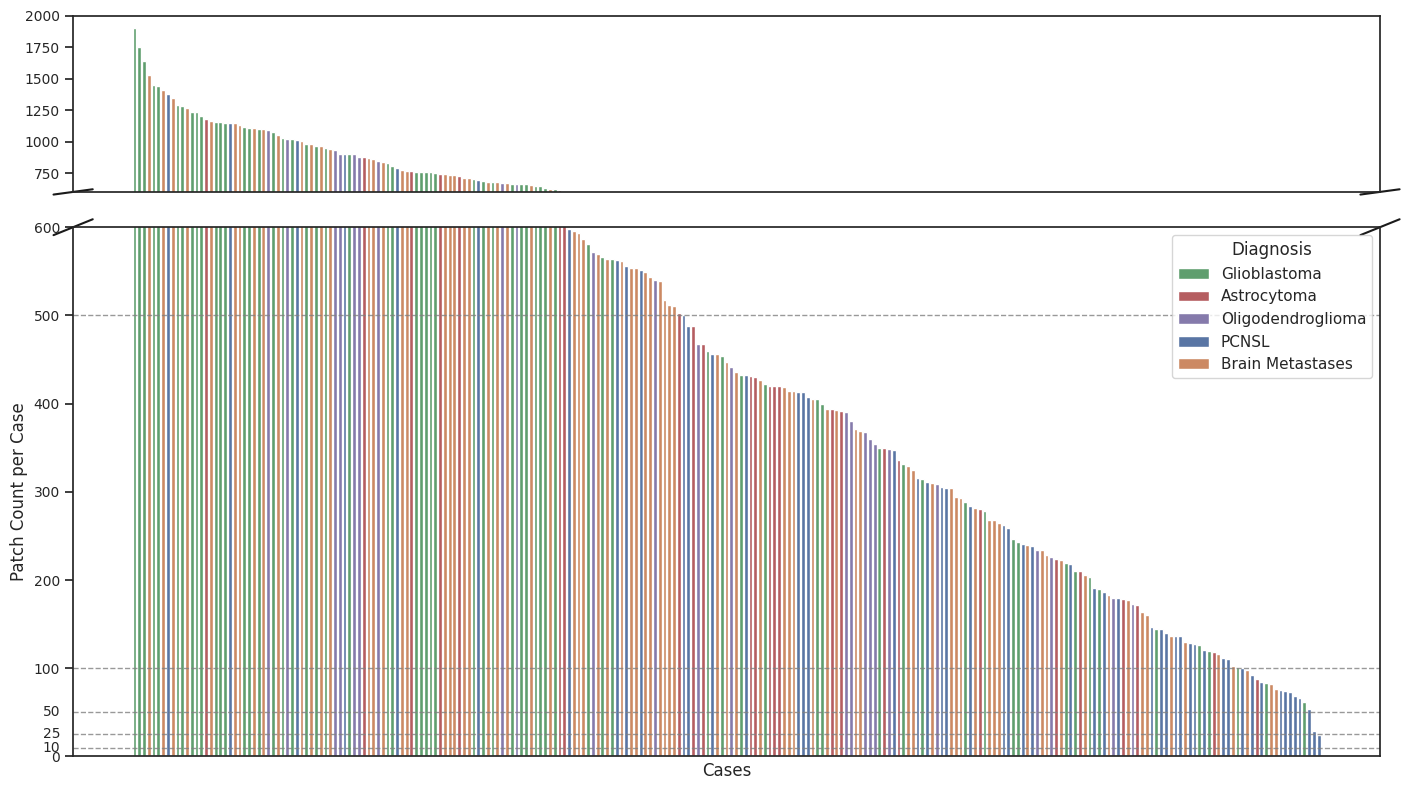

In [5]:
# Broken axis

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# legendの順序と対応するfull name
legend_full_names = {
    'G': 'Glioblastoma',
    'A': 'Astrocytoma',
    'O': 'Oligodendroglioma',
    'L': 'PCNSL',
    'M': 'Brain Metastases',
}

# グラフを2つのサブプロットに分割
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# データの最大値を取得
max_value = ds.df['diag'].value_counts().max()

# 上部のプロット（600以上）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax1)
ax1.set_ylim(600, 2000)
ax1.set_xticks([])
ax1.set_xlabel('')

# 下部のプロット（0から600）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax2)
ax2.set_ylim(0, 600)
ax2.set_xticks([])
ax2.set_xlabel('Cases')
ax2.set_yticks([0, 100, 200, 300, 400, 500, 600])

# y軸のラベルを設定
ax2.set_ylabel('Patch Count per Case')
ax1.set_ylabel('')

# 横線を追加（下部プロットのみ）
for y in [500, 100, 50, 25, 10]:
    ax2.axhline(y=y, color='gray', linestyle='--', alpha=0.8, linewidth=1)
    if y not in [500, 100]:
        ax2.text(-0.01, y, str(y), va='center', ha='right', transform=ax2.get_yaxis_transform())

# legendを手動で並べ替えてfull nameで表示（下部プロットにのみ配置）
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(
    [by_label[l] for l in legend_full_names],
    list(legend_full_names.values()),
    title='Diagnosis',
    loc='upper right'
)
ax1.legend().remove()  # 上部プロットのlegendを削除

# プロット間の空白を調整
plt.tight_layout()
fig.subplots_adjust(hspace=0.1)

# 軸の分割を示す斜線を追加
d = .015  # サイズ
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# def draw_wave(ax, x, y, width, height, wavelength=0.1, amplitude=0.01):
#     t = np.linspace(0, width, 100)
#     ax.plot(x + t, y + amplitude * np.sin(2 * np.pi * t / wavelength), 
#             color='k', clip_on=False, transform=ax.transAxes)
# draw_wave(ax1, 0, -0.02, 1, 0.02)
# draw_wave(ax2, 0, 1.02, 1, 0.02)

plt.savefig("out/figs/fig2_count.png", format="png", dpi=300)
plt.show()

## Table2

Compare metrics between conditions

In [6]:
from scipy import stats
from functools import lru_cache

cache = {}
def load_df(p):
    if p in cache:
        print
        return cache[p]
    df = pd.read_excel(p, sheet_name='report', index_col=0)
    # cache[p] = df
    return df

def calc_score(values):
    se = stats.sem(values)
    mean = np.mean(values)
    cis = stats.t.interval(confidence=0.95, df=len(values)-1, loc=mean, scale=se)
    return [mean, *cis]


metrics = {
    'Accuracy': lambda df: df[df.index == 'accuracy'].iloc[0, 0],
    'Accuracy(Patch)': lambda df: df[df.index == 'patch acc'].iloc[0, 0],
    'F1 score': lambda df: df[df.index == 'macro avg'].iloc[0]['f1-score'],
    'Precision': lambda df: df[df.index == 'macro avg'].iloc[0]['precision'],
    'Recall': lambda df: df[df.index == 'macro avg'].iloc[0]['recall'],
    'AUROC ': lambda df: df[df.index == 'auc'].iloc[0, 0],
}


def get_metrics(cond, label=True):
    global cache
    cache = {}
    mm = {}
    for k, fn in metrics.items():
        m = []
        for fold in range(5):
            p = f'out/compare/LMGAOB/fold5_{fold}/{cond}/test/report.xlsx'
            df = load_df(p)
            try:
                value = fn(df)
            except Exception as e:
                print('Error in', p)
                print(df)
                raise e
            m.append(value)
        mm[k] = m
    return mm

def metrics2score(mm):
    r = {}
    for k, values in mm.items():
        score = calc_score(values)
        r[k] = '{:.3f}±({:.3f}-{:.3f})'.format(*score)
    return r

conds = [
    'unfrozen_uni_100_1e-5',
    'frozen_uni_100',
    'frozen_gigapath_100',
    'unfrozen_ctranspath_100_1e-5',    
    'frozen_ctranspath_100',
    'unfrozen_baseline-vit_100_1e-5',
    'unfrozen_baseline-cnn_100',
]
labels = [
    'UNI(Enc+FC)',
    'UNI(FC)',
    'Prov-GigaPath(FC)',    
    'CTransPath(Enc+FC)',
    'CTransPath(FC)',
    'ResNet-RS 50(Enc+FC)',
    'VIT-L(Enc+FC)',
]

def summary_metrics(conds):
    return [get_metrics(cond) for cond in conds]

def summary_score(conds):
    return [metrics2score(get_metrics(cond)) for cond in conds]
        
scores = summary_score(conds)
df = pd.DataFrame(scores, index=labels)
df.to_excel('out/figs/table2.xlsx')
df

,Accuracy,Accuracy(Patch),F1 score,Precision,Recall,AUROC
UNI(Enc+FC),0.944±(0.926-0.962),0.904±(0.888-0.920),0.872±(0.826-0.919),0.895±(0.857-0.934),0.880±(0.820-0.940),0.995±(0.990-0.999)
UNI(FC),0.944±(0.916-0.973),0.895±(0.869-0.922),0.880±(0.811-0.949),0.894±(0.833-0.955),0.878±(0.799-0.958),0.994±(0.989-0.999)
Prov-GigaPath(FC),0.947±(0.911-0.983),0.901±(0.881-0.922),0.877±(0.790-0.964),0.890±(0.812-0.967),0.881±(0.794-0.967),0.994±(0.989-0.999)
CTransPath(Enc+FC),0.934±(0.891-0.978),0.871±(0.843-0.898),0.876±(0.783-0.968),0.886±(0.792-0.981),0.877±(0.779-0.975),0.991±(0.982-0.999)
CTransPath(FC),0.927±(0.901-0.953),0.845±(0.820-0.870),0.839±(0.779-0.899),0.855±(0.783-0.928),0.853±(0.784-0.921),0.990±(0.981-0.999)
ResNet-RS 50(Enc+FC),0.924±(0.897-0.952),0.847±(0.828-0.865),0.833±(0.789-0.878),0.852±(0.790-0.913),0.835±(0.799-0.870),0.987±(0.979-0.995)
VIT-L(Enc+FC),0.937±(0.904-0.970),0.855±(0.834-0.877),0.858±(0.783-0.933),0.880±(0.811-0.949),0.861±(0.789-0.934),0.993±(0.987-0.998)


## Paired t-test

### 100 patches/case

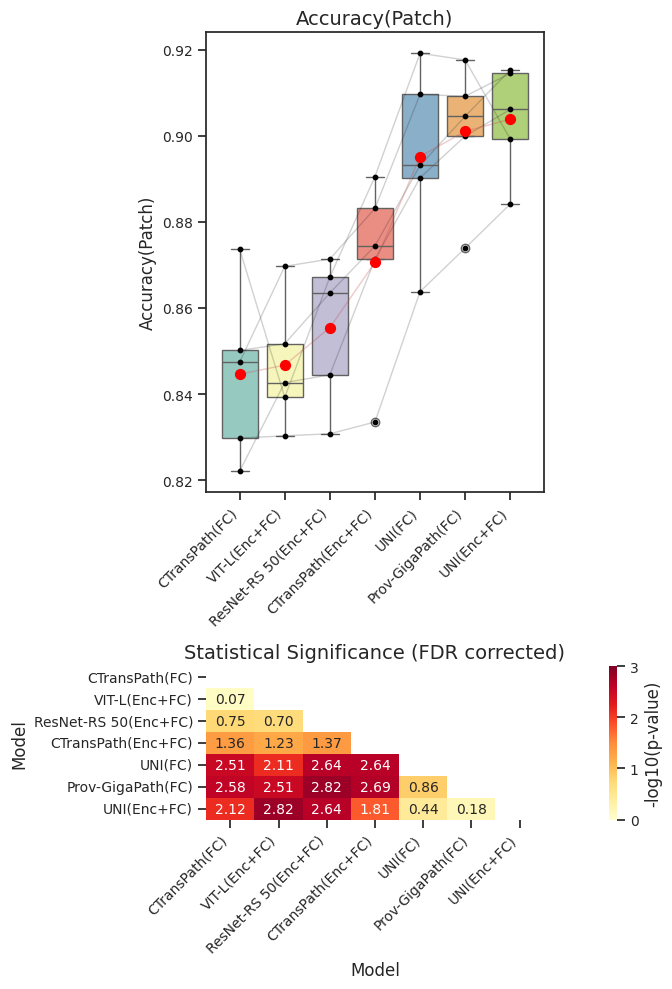

In [7]:
from statsmodels.stats.multitest import multipletests

def paired_box(target, data, labels, title=None):
    n_folds, n_models = data.shape

    df = pd.DataFrame(data, columns=labels)
    df = df[df.mean().sort_values(ascending=True).index].copy()
    df_melted = df.melt(var_name='Model', value_name='Score')
    df_melted['Fold'] = np.tile(np.arange(n_folds), len(conds))
    
    # print(title)
    # if title:
    #     plt.suptitle(title, fontsize=16)

    # sns.set_style('white')

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(hspace=0.3)
    
    # ボックスプロットの作成
    sns.boxplot(x='Model', hue='Model', y='Score', data=df_melted, palette='Set3', legend=False, ax=ax1)
    
    # 対応する点を線で結ぶ
    for fold in range(n_folds):
        fold_data = df_melted[df_melted['Fold'] == fold]
        ax1.plot(range(n_models), fold_data['Score'], 'k-', alpha=0.2, linewidth=1)
    
    for i, model in enumerate(df.columns):
        ax1.scatter([i] * n_folds, df[model], color='black', s=10, zorder=3)

    mean_values = df.mean()
    ax1.plot(range(n_models), mean_values, 'r-', linewidth=1, zorder=4, alpha=0.3)
    ax1.scatter(range(n_models), mean_values, color='red', s=50, zorder=5, label='Mean')

    ax1.set_title(target)
    ax1.set_xticks(range(len(df.columns)))
    ax1.set_xticklabels(df.columns, rotation=45, ha='right')
    ax1.set_xlabel('')
    ax1.set_ylabel(target)

    p_values = []
    for i in range(n_models):
        for j in range(i+1, n_models):
            t_stat, p_value = stats.ttest_rel(df.iloc[:, i], df.iloc[:, j])
            p_values.append(p_value)
    
    # Benjamini-Hochberg法による多重検定の補正
    _, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')
    # p_corrected = p_values
       
    # 三角形の有意差マトリックスの作成
    sig_matrix = np.zeros((n_models, n_models))
    k = 0
    for i in range(n_models):
        for j in range(i+1, n_models):
            sig_matrix[j, i] = -np.log10(p_corrected[k])  # 左下三角形に値を設定
            k += 1
    
    # マスクの作成（下三角形のみを表示）
    mask = np.triu(np.ones_like(sig_matrix, dtype=bool), k=0)
    
    # ヒートマップの作成
    heatmap = sns.heatmap(sig_matrix, mask=mask, annot=True, fmt='.2f', cmap='YlOrRd', 
                ax=ax2, cbar_kws={'label': '-log10(p-value)'}, vmin=0.0, vmax=3.0)
    ax2.set_xticklabels(df.columns, rotation=45, ha='right')
    ax2.set_yticklabels(df.columns, rotation=0)
    ax2.set_title('Statistical Significance (FDR corrected)')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Model')
    
    cbar_pos = heatmap.collections[0].colorbar.ax.get_position()
    plt.tight_layout()
    ax1_pos = ax1.get_position()
    ax2_pos = ax2.get_position()
    new_width = cbar_pos.x0 - ax2_pos.x0
    ax1.set_position([ax1_pos.x0, ax1_pos.y0, new_width, ax1_pos.height])
    ax2.set_position([ax2_pos.x0, ax2_pos.y0, new_width, ax2_pos.height])


def paired_box_by_target(target, conds, labels, title=None):
    metrics = summary_metrics(conds)
    data = [m[target] for m in metrics]
    data = np.array(data).T
    paired_box(target, data, labels, title=title)


target = 'Accuracy(Patch)'

conds = [
    'unfrozen_baseline-vit_100_1e-5',
    'frozen_ctranspath_100',
    'unfrozen_baseline-cnn_100',
    'unfrozen_ctranspath_100_1e-5',
    'frozen_uni_100',
    'frozen_gigapath_100',
    'unfrozen_uni_100_1e-5',
]
labels = [
    'VIT-L(Enc+FC)',
    'CTransPath(FC)',
    'ResNet-RS 50(Enc+FC)',    
    'CTransPath(Enc+FC)',
    'UNI(FC)',
    'Prov-GigaPath(FC)',
    'UNI(Enc+FC)',
]

paired_box_by_target('Accuracy(Patch)', conds, labels, title='Comparison for 100patchs/case')
plt.savefig("out/figs/fig3_pacc.png", format="png", dpi=300)
plt.show()

fig2: 異なるモデルのパッチレベル精度の比較と統計的有意差
(A) 7つの異なる深層学習モデルのパッチレベル精度をボックスプロットで示す。各ボックスは四分位範囲を、ひげは1.5倍の四分位範囲内のデータ範囲を示す。外れ値は個別の点として表示。黒い点は個々のフォールドのスコアを、赤い点は平均値を示す。モデルは平均精度の昇順に左から右へ配置。
(B) モデル間のパッチレベル精度の統計的有意差をヒートマップで示す。色の濃さと数値は-log10(補正済みp値)を表し、値が大きいほど強い有意差を示す。p値はペアワイズのt検定（両側）で算出し、Benjamini-Hochberg法で多重比較補正を適用。ヒートマップの各セルは、行のモデルと列のモデルの比較を表す。例えば、-log10(p値) > 1.30は5%水準で有意 (p < 0.05)、> 2は1%水準で有意 (p < 0.01)、> 3は0.1%水準で極めて有意 (p < 0.001) を示す。
この図は、モデル間の性能差を視覚的に表現し、統計的に有意な差を定量化している。例えば、VIT-L(Enc+FC)モデルはUNI(Enc+FC)モデルと比較して有意に高い精度を示している（p < 0.001）。一方、CTransPath(FC)とResNet-RS 50(Enc+FC)の間には統計的に有意な差が見られない（p > 0.05）。これらの結果は、タスクに最適なモデル選択や、モデル間の性能差の重要性を評価する上で有用な情報を提供する。

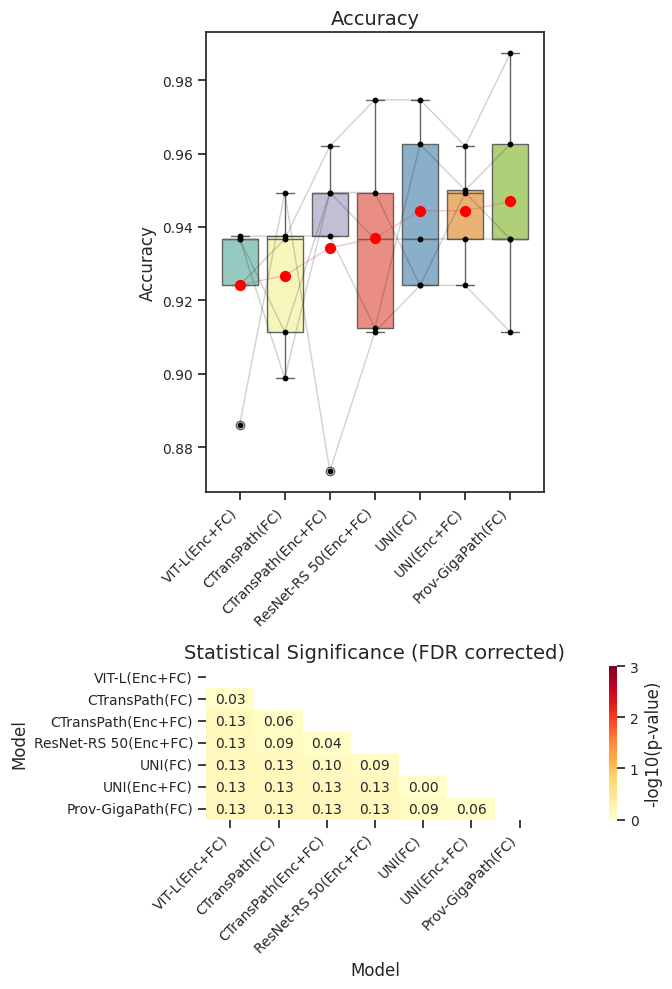

In [8]:
paired_box_by_target('Accuracy', conds, labels, title='Comparison for 100patchs/case')
plt.savefig("out/figs/fig3_acc.png", format="png", dpi=300)
plt.show()

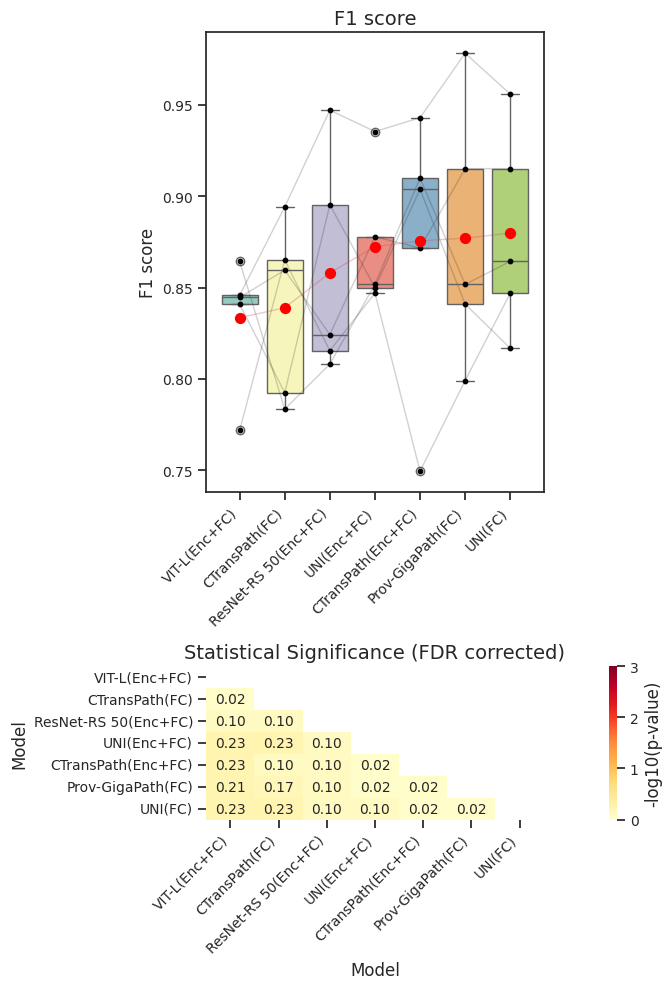

In [9]:
paired_box_by_target('F1 score', conds, labels, title='Comparison for 100patchs/case')
plt.savefig("out/figs/fig3_f1.png", format="png", dpi=300)
plt.show()

### 10 patches/case

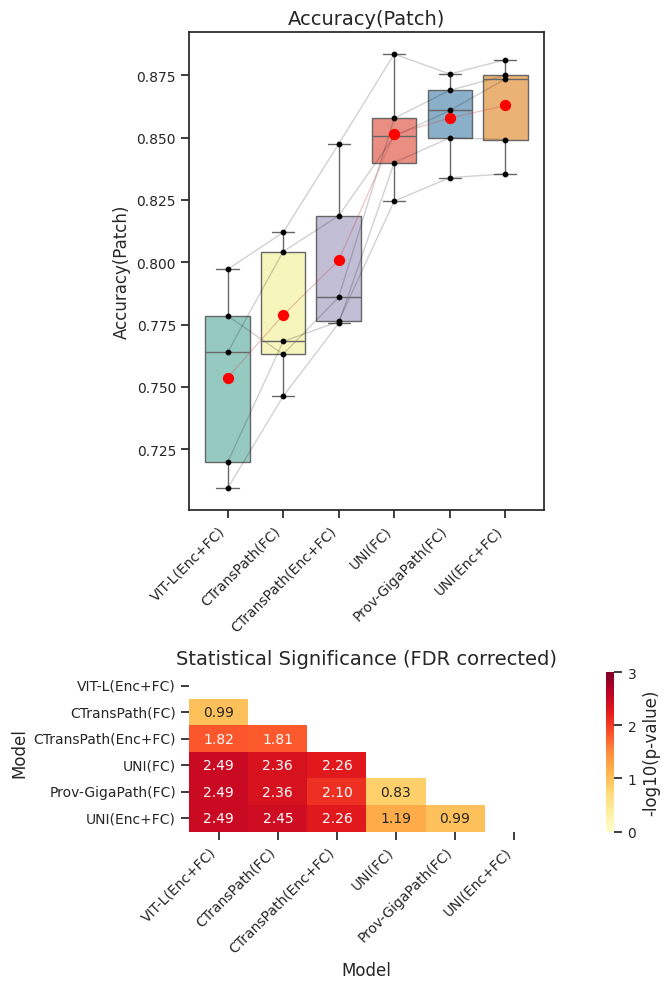

In [10]:
conds = [
    'unfrozen_baseline-vit_10_1e-5',
    'frozen_ctranspath_10',
    'unfrozen_ctranspath_10_1e-5',
    'frozen_gigapath_10',
    'frozen_uni_10',
    'unfrozen_uni_10_1e-5',
]

labels = [
    'VIT-L(Enc+FC)',
    'CTransPath(FC)',
    'CTransPath(Enc+FC)',
    'Prov-GigaPath(FC)',
    'UNI(FC)',
    'UNI(Enc+FC)',
]
paired_box_by_target('Accuracy(Patch)', conds, labels)
plt.savefig("out/figs/fig4_10_pacc.png", format="png", dpi=300)
# plt.show()

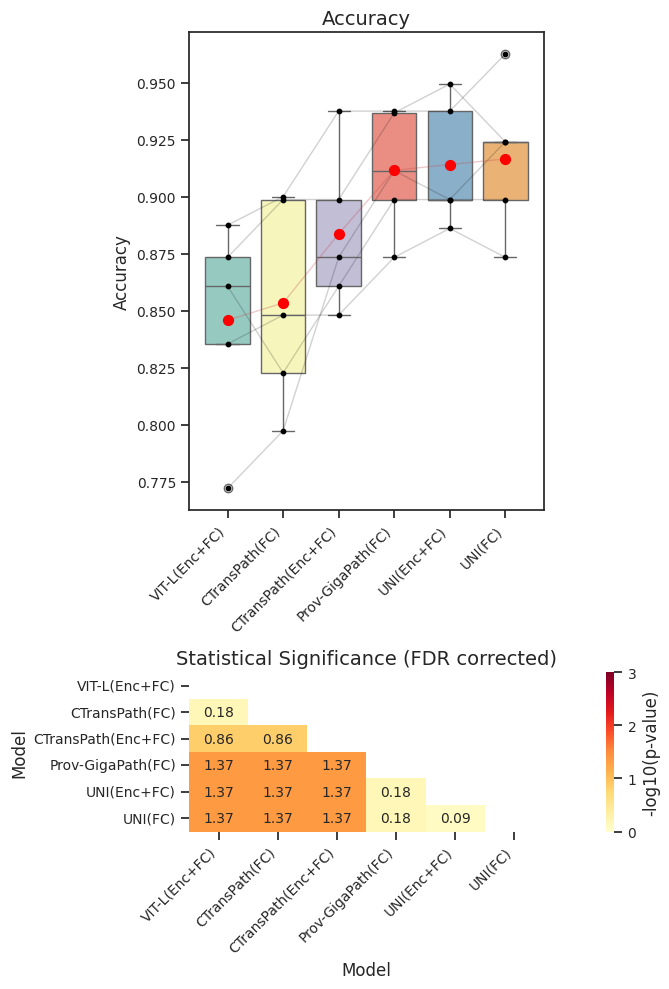

In [11]:
paired_box_by_target('Accuracy', conds, labels)
plt.savefig("out/figs/fig4_10_acc.png", format="png", dpi=300)
plt.show()

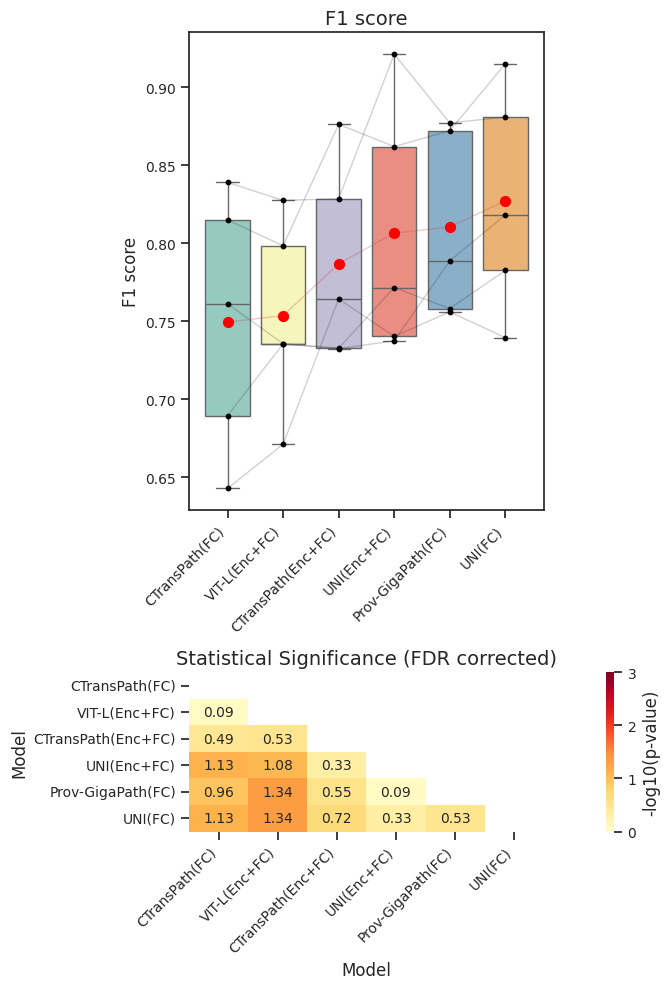

In [12]:
paired_box_by_target('F1 score', conds, labels, title='Comparison for 10patchs/case')
plt.savefig("out/figs/fig4_10_f1.png", format="png", dpi=300)
plt.show()

### 25 patches/case

In [13]:
print('10 pathes/case')
conds = [
    'frozen_gigapath_10',
    'frozen_uni_10',
    'unfrozen_uni_10_1e-5',
    'unfrozen_baseline-vit_10_1e-5',
]
display(pd.DataFrame(summary_score(conds), index=conds))

print('25 pathes/case')
conds = [
    'frozen_gigapath_25',
    'frozen_uni_25',
    'unfrozen_uni_25_1e-5',
    'unfrozen_baseline-vit_25_1e-5',
]
display(pd.DataFrame(summary_score(conds), index=conds))

print('100 pathes/case')
conds = [
    'frozen_gigapath_100',
    'frozen_uni_100',
    'unfrozen_uni_100_1e-5',
    'unfrozen_baseline-vit_100_1e-5', # 100はsuffixなしで 1e-5
]
display(pd.DataFrame(summary_score(conds), index=conds))

print('500 pathes/case')
conds = [
    'frozen_gigapath_500',
    'frozen_uni_500',
    'unfrozen_uni_500_1e-5',
    'unfrozen_baseline-vit_500_1e-5',
]
display(pd.DataFrame(summary_score(conds), index=conds))

10 pathes/case


,Accuracy,Accuracy(Patch),F1 score,Precision,Recall,AUROC
frozen_gigapath_10,0.912±(0.878-0.945),0.858±(0.837-0.878),0.811±(0.736-0.885),0.838±(0.754-0.921),0.826±(0.759-0.892),0.990±(0.985-0.996)
frozen_uni_10,0.917±(0.875-0.958),0.851±(0.824-0.878),0.827±(0.739-0.916),0.855±(0.751-0.959),0.840±(0.759-0.920),0.990±(0.983-0.997)
unfrozen_uni_10_1e-5,0.914±(0.880-0.948),0.863±(0.839-0.887),0.807±(0.705-0.908),0.810±(0.682-0.937),0.828±(0.757-0.899),0.990±(0.981-0.999)
unfrozen_baseline-vit_10_1e-5,0.846±(0.789-0.902),0.754±(0.707-0.801),0.754±(0.678-0.830),0.817±(0.776-0.858),0.749±(0.656-0.842),0.978±(0.962-0.994)


25 pathes/case


,Accuracy,Accuracy(Patch),F1 score,Precision,Recall,AUROC
frozen_gigapath_25,0.927±(0.896-0.957),0.884±(0.862-0.905),0.841±(0.759-0.923),0.853±(0.783-0.924),0.850±(0.763-0.938),0.993±(0.987-0.999)
frozen_uni_25,0.927±(0.886-0.968),0.868±(0.840-0.895),0.846±(0.758-0.933),0.867±(0.765-0.969),0.855±(0.775-0.936),0.992±(0.986-0.998)
unfrozen_uni_25_1e-5,0.932±(0.908-0.956),0.872±(0.844-0.900),0.858±(0.823-0.892),0.868±(0.824-0.913),0.868±(0.834-0.901),0.992±(0.984-0.999)
unfrozen_baseline-vit_25_1e-5,0.871±(0.835-0.907),0.786±(0.759-0.813),0.779±(0.748-0.809),0.803±(0.755-0.851),0.786±(0.763-0.809),0.980±(0.970-0.991)


100 pathes/case


,Accuracy,Accuracy(Patch),F1 score,Precision,Recall,AUROC
frozen_gigapath_100,0.947±(0.911-0.983),0.901±(0.881-0.922),0.877±(0.790-0.964),0.890±(0.812-0.967),0.881±(0.794-0.967),0.994±(0.989-0.999)
frozen_uni_100,0.944±(0.916-0.973),0.895±(0.869-0.922),0.880±(0.811-0.949),0.894±(0.833-0.955),0.878±(0.799-0.958),0.994±(0.989-0.999)
unfrozen_uni_100_1e-5,0.944±(0.926-0.962),0.904±(0.888-0.920),0.872±(0.826-0.919),0.895±(0.857-0.934),0.880±(0.820-0.940),0.995±(0.990-0.999)
unfrozen_baseline-vit_100_1e-5,0.924±(0.897-0.952),0.847±(0.828-0.865),0.833±(0.789-0.878),0.852±(0.790-0.913),0.835±(0.799-0.870),0.987±(0.979-0.995)


500 pathes/case


,Accuracy,Accuracy(Patch),F1 score,Precision,Recall,AUROC
frozen_gigapath_500,0.949±(0.909-0.990),0.908±(0.886-0.929),0.881±(0.784-0.977),0.912±(0.829-0.994),0.881±(0.782-0.981),0.995±(0.990-1.000)
frozen_uni_500,0.949±(0.908-0.991),0.904±(0.880-0.929),0.885±(0.789-0.980),0.917±(0.833-1.001),0.883±(0.791-0.976),0.994±(0.988-1.001)
unfrozen_uni_500_1e-5,0.942±(0.909-0.974),0.912±(0.898-0.925),0.861±(0.776-0.946),0.887±(0.785-0.989),0.866±(0.794-0.938),0.997±(0.994-0.999)
unfrozen_baseline-vit_500_1e-5,0.927±(0.898-0.955),0.876±(0.852-0.900),0.833±(0.747-0.919),0.864±(0.767-0.960),0.833±(0.750-0.917),0.996±(0.992-0.999)


#### fig4

This fig shows the impact of patch number per case on model performace

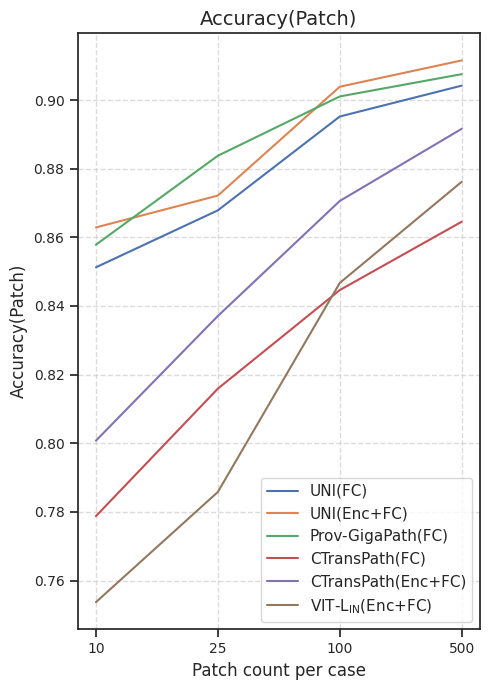

In [14]:
def draw_lines(target):
    if target == 'f1':
        score_fn = lambda df: df[df.index == 'macro avg'].iloc[0]['f1-score']
        title = 'F1 score'
    elif target == 'acc':
        score_fn = lambda df: df[df.index == 'accuracy'].iloc[0, 0]
        title = 'Accuracy'
    elif target == 'pacc':
        score_fn = lambda df: df[df.index == 'patch acc'].iloc[0, 0]
        title = 'Accuracy(Patch)'
    else:
        raise RuntimeError('Invalid target', target)
    
    conds = [
        'frozen_uni',
        'unfrozen_uni',
        'frozen_gigapath',
        'frozen_ctranspath',
        'unfrozen_ctranspath',
        'unfrozen_baseline-vit',
    ]
    labels = [
        r'UNI(FC)',
        r'UNI(Enc+FC)',
        r'Prov-GigaPath(FC)',
        r'CTransPath(FC)',
        r'CTransPath(Enc+FC)',
        r'VIT-L$\mathrm{_{IN}}$(Enc+FC)',
    ]
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # limits = [10, 25, 50, 100, 500]
    limits = [10, 25, 100, 500]
    alpha = 0.05
    
    values_by_cond = []
    for cond in conds:
        values = []
        for limit in limits:
            scores = []
            for fold in range(5):
                d = f'{cond}_{limit}'
                if cond.startswith('unfrozen'):
                    d += '_1e-5'
                report_path = f'out/compare/LMGAOB/fold5_{fold}/{d}/test/report.xlsx'
                df = pd.read_excel(report_path, sheet_name='report', index_col=0)
                # score = df[df.index == 'macro avg'].iloc[0]['f1-score']
                # score = df[df.index == 'accuracy'].iloc[0, 0]
                score = score_fn(df)
                scores.append(score)
            mean = np.mean(scores)
            n = len(scores)
            std_err = np.std(scores, ddof=1) / np.sqrt(n)
            # ci = stats.t.interval(1 - alpha, df=n-1, loc=mean, scale=std_err)
            ci = [mean-std_err, mean+std_err]
            values.append([mean, *ci])
        values_by_cond.append(values)
    
    values_by_cond = np.array(values_by_cond)
    # print(values_by_cond)
    
    plt.figure(figsize=(5, 7))
    x = np.arange(1, 1+len(limits))
    
    for i in range(len(conds)):
        ci_l = values_by_cond[i, :, 1]
        ci_h = values_by_cond[i, :, 2]
        c = colors[i]
        plt.plot(x, values_by_cond[i, :, 0], color=c, label=labels[i])
        # plt.fill_between(x, ci_l, ci_h, color=c, alpha=0.2)
    # plt.plot(x, y1, 'g-', label=labels[1])
    # plt.fill_between(x, ci1[:, 0], ci1[:, 1], color='g', alpha=0.2)
    
    plt.xticks(x, limits)
    
    plt.xlabel('Patch count per case')
    plt.ylabel(title)
    plt.legend(loc='lower right')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
draw_lines('pacc')
plt.savefig(f"out/figs/fig4_pacc.png", format="png", dpi=300)
plt.show()

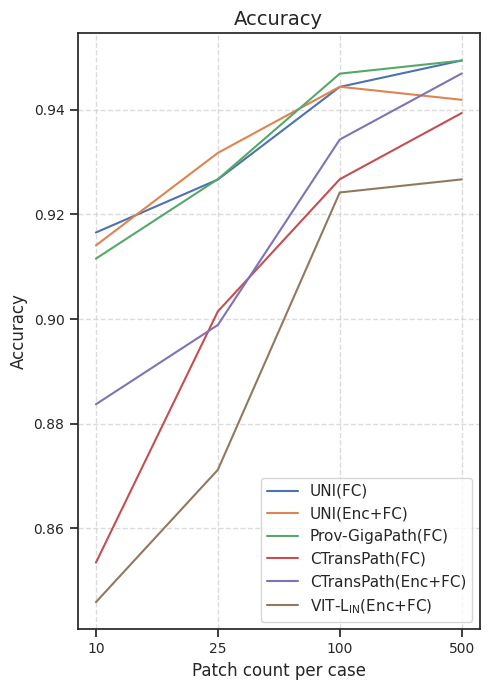

In [15]:
draw_lines('acc')
plt.savefig(f"out/figs/fig4_acc.png", format="png", dpi=300)
plt.show()

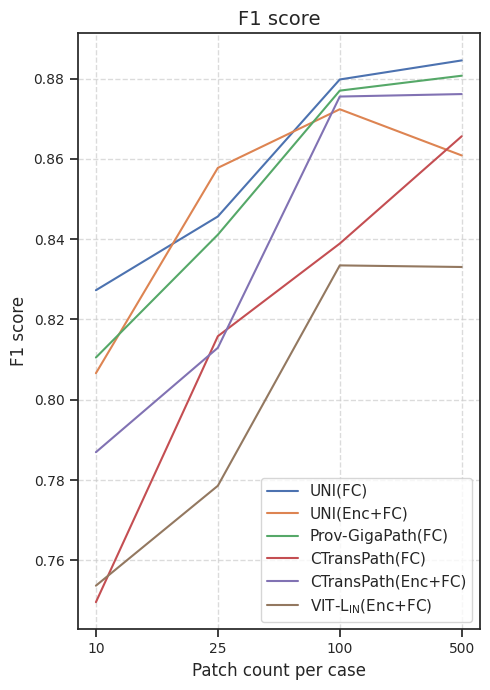

In [16]:
draw_lines('f1')
plt.savefig(f"out/figs/fig4_f1.png", format="png", dpi=300)
plt.show()